In [1]:
%run ../src/start.py


python	3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
---------------------
Versions:
----------------------
pandas      1.1.2
numpy       1.19.1
matplotlib  3.3.1
seaborn     0.11.0
plotly      4.11.0
----------------------


Loaded Libraries
-------------------
import pandas as pd
import numpy as np
import sys,os
import re
import glob
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
----------------


GLOBAL VARIABLES
--------------------------
HERE_DIR: list current directory path
RAW_DIR: list files in `data\raw` directory
INTER_DIR: list files in `data\interim` directory
FINAL_DIR: list files in `data\final` directory
SRC_DIR: list files in `src\` directory
------------------------------

# SAVE PLOTS
To save a plot call
`save_plots(fig_variable,'name_of_plot')`

source file: src/start.py




# load data 

In [ ]:
INTER_DIR

In [2]:
file_name = 't1_data_clean.csv'
inter_data = os.path.join('..','data','interim',f'{file_name}')
df = pd.read_csv(inter_data,parse_dates=['date_time'],index_col='date_time')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50530 entries, 2018-01-01 00:00:00 to 2018-12-31 23:50:00
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   lv_activepower_kw            50530 non-null  float64
 1   wind_speed_m_s               50530 non-null  float64
 2   theoretical_power_curve_kwh  50530 non-null  float64
 3   wind_direction_deg           50530 non-null  float64
 4   direction                    50530 non-null  object 
dtypes: float64(4), object(1)
memory usage: 2.3+ MB


## SweetVix

In [7]:
#! pip install sweetviz
#!conda install -c conda-forge windrose -y
#!conda install -c conda-forge ipywidgets -y
#! pip install pandas-ui

In [4]:
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
hr_df = df.copy()

hr_df['activepower_kwr'] = hr_df.lv_activepower_kw.resample('H').sum()

In [ ]:
hr_df.head()

In [ ]:
#plotting each data
cols_plot = ['lv_activepower_kw', 'wind_speed_m_s', 'theoretical_power_curve_kwh','wind_direction_deg']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

In [ ]:
# Plot the data distributions
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df.iloc[:,i], shade=True)
    plt.title(df.columns[i])
plt.tight_layout()
plt.show()

In [ ]:
!conda install -c conda-forge windrose -y

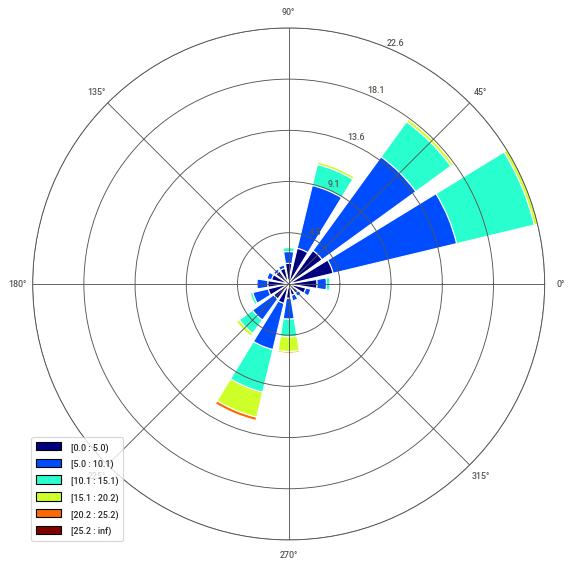

In [5]:
from windrose import WindroseAxes

# Create wind speed and direction variables
ax = WindroseAxes.from_ax()
ax.bar(df['wind_direction_deg'], df['wind_speed_m_s'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()